In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

con esto leeremos el archivo tuve que hacer algo raro con ISO porque sino no agarraba

In [4]:
df = pd.read_csv('C:\\Users\\Usuario\\Downloads\\Wheat.csv', encoding='ISO-8859-1')

In [5]:
df

,TypeCode,FreqCode,RefPeriodId,RefYear,RefMonth,Period,ReporterCode,ReporterISO,ReporterDesc,FlowCode,...,IsNetWgtEstimated,GrossWgt,IsGrossWgtEstimated,Cifvalue,Fobvalue,PrimaryValue,LegacyEstimationFlag,IsReported,IsAggregate,Unnamed: 47
0,C,A,20000101,2000,52,2000,50,BGD,Bangladesh,M,...,False,NaN,False,129164.0,NaN,129164.0,0,True,False,NaN
1,C,A,20000101,2000,52,2000,108,BDI,Burundi,M,...,False,NaN,False,103.0,NaN,103.0,0,True,False,NaN
2,C,A,20000101,2000,52,2000,251,FRA,France,M,...,False,NaN,False,842.0,NaN,842.0,0,False,False,NaN
3,C,A,20000101,2000,52,2000,344,HKG,"China, Hong Kong SAR",M,...,False,NaN,False,1925.0,NaN,1925.0,0,False,False,NaN
4,C,A,20000101,2000,52,2000,404,KEN,Kenya,M,...,False,NaN,False,1050718.0,NaN,1050718.0,0,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,C,A,20190101,2019,52,2019,762,TJK,Tajikistan,M,...,False,0.0,False,802.0,0.0,802.0,0,False,True,NaN
73,C,A,20190101,2019,52,2019,764,THA,Thailand,M,...,True,0.0,False,39.4,NaN,39.4,6,False,True,NaN
74,C,A,20190101,2019,52,2019,800,UGA,Uganda,M,...,False,0.0,False,150.0,0.0,150.0,0,False,True,NaN
75,C,A,20190101,2019,52,2019,842,USA,USA,M,...,False,0.0,False,2518.0,2418.0,2518.0,0,False,True,NaN


In [6]:
df_subset = df[["RefYear","ReporterDesc", "PrimaryValue", "NetWgt"]]
pd.set_option('display.float_format', lambda x: '%d' % x)
df_subset.head(10)

,RefYear,ReporterDesc,PrimaryValue,NetWgt
0,2000,Bangladesh,129164,960000
1,2000,Burundi,103,42
2,2000,France,842,1000
3,2000,"China, Hong Kong SAR",1925,18
4,2000,Kenya,1050718,6545000
5,2000,Rep. of Korea,4264,6598
6,2000,"China, Macao SAR",7651,0
7,2000,Mongolia,188070,2661000
8,2000,Aruba,39,40
9,2000,Nigeria,3965290,12466963


In [7]:
df_china_ordenado = df_subset.sort_values(by=['PrimaryValue', 'NetWgt'], ascending=[False, False])
df_china_ordenado.head(10)

,RefYear,ReporterDesc,PrimaryValue,NetWgt
50,2019,Ethiopia,6648240,7408000
20,2009,Sri Lanka,5568028,21276000
9,2000,Nigeria,3965290,12466963
14,2000,Egypt,3371760,22288081
36,2009,Philippines,1485340,8469948
16,2009,Bangladesh,1230479,3642441
4,2000,Kenya,1050718,6545000
34,2009,Nigeria,797200,263043
46,2019,Chile,421323,0
31,2009,Mozambique,379554,936199


In [8]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x) # para desactivar la notacion cientifica
df_subset_ordenado_2019 = df_subset[df_subset['RefYear'] == 2019].sort_values(by='PrimaryValue', ascending=False).head(10)
df_subset_ordenado_2019

,RefYear,ReporterDesc,PrimaryValue,NetWgt
50,2019,Ethiopia,6648240,7408000
46,2019,Chile,421323,0
55,2019,Rep. of Korea,136131,508239
76,2019,Uzbekistan,126000,700000
52,2019,France,89592,31641
69,2019,Viet Nam,78705,76500
71,2019,Sweden,52757,12576
53,2019,Germany,43638,25571
70,2019,Spain,33317,9588
62,2019,Norway,16587,26422


In [9]:
# Supongamos que tienes el DataFrme df_subset_ordenado_2019

# Agregar la columna 'Importancia'
df_subset_ordenado_2019['Importancia'] = ['Numero 1 ', 'Numero 2 ','Numero 3 ','Numero 4 ', 'Numero 5 ','Numero 6 ','Numero 7 ', 'Numero 8 ','Numero 9 ','Numero 10']

# Seleccionar las primeras 10 filas y mostrar el DataFrame
df_subset_ordenado_2019 = df_subset_ordenado_2019.head(10)

# Reorganizar las columnas y mover 'Importancia' al principio del DataFrame
columnas = ['Importancia'] + [col for col in df_subset_ordenado_2019 if col != 'Importancia']
df_subset_ordenado_2019 = df_subset_ordenado_2019[columnas]

# Supongamos que tienes un DataFrame df y deseas dividir todas las columnas por 10
df_subset_ordenado_2019[['NetWgt']] = df_subset_ordenado_2019[['NetWgt']] / 1000 #como esta en kg

df_subset_ordenado_2019.rename(columns={'RefYear': 'Año', 'ReporterDesc': 'País', 'PrimaryValue':'FOB[USD]', 'NetWgt':'Toneladas'}, inplace=True)

# Mostrar el DataFrame actualizado
print(df_subset_ordenado_2019)


   Importancia   Año           País  FOB[USD]  Toneladas
50   Numero 1   2019       Ethiopia   6648240       7408
46   Numero 2   2019          Chile    421323          0
55   Numero 3   2019  Rep. of Korea    136131        508
76   Numero 4   2019     Uzbekistan    126000        700
52   Numero 5   2019         France     89592         31
69   Numero 6   2019       Viet Nam     78705         76
71   Numero 7   2019         Sweden     52757         12
53   Numero 8   2019        Germany     43638         25
70   Numero 9   2019          Spain     33317          9
62   Numero 10  2019         Norway     16587         26


In [10]:
df_subset_ordenado_2000 = df_subset[df_subset['RefYear'] == 2000].sort_values(by='PrimaryValue', ascending=False).head(10)
df_subset_ordenado_2000

,RefYear,ReporterDesc,PrimaryValue,NetWgt
9,2000,Nigeria,3965290,12466963
14,2000,Egypt,3371760,22288081
4,2000,Kenya,1050718,6545000
10,2000,Russian Federation,358330,3975341
7,2000,Mongolia,188070,2661000
12,2000,Switzerland,179277,1020300
0,2000,Bangladesh,129164,960000
6,2000,"China, Macao SAR",7651,0
5,2000,Rep. of Korea,4264,6598
13,2000,Thailand,4182,21820


In [11]:
# Supongamos que tienes el DataFrme df_subset_ordenado_2019

# Agregar la columna 'Importancia'
df_subset_ordenado_2000['Importancia'] = ['Numero 1 ', 'Numero 2 ','Numero 3 ','Numero 4 ', 'Numero 5 ','Numero 6 ','Numero 7 ', 'Numero 8 ','Numero 9 ','Numero 10']

# Seleccionar las primeras 10 filas y mostrar el DataFrame
df_subset_ordenado_2000 = df_subset_ordenado_2000.head(10)

# Reorganizar las columnas y mover 'Importancia' al principio del DataFrame
columnas = ['Importancia'] + [col for col in df_subset_ordenado_2000 if col != 'Importancia']
df_subset_ordenado_2000 = df_subset_ordenado_2000[columnas]

# Supongamos que tienes un DataFrame df y deseas dividir todas las columnas por 10
df_subset_ordenado_2000[['NetWgt']] = df_subset_ordenado_2000[['NetWgt']] / 1000 #como esta en kg

df_subset_ordenado_2000.rename(columns={'RefYear': 'Año', 'ReporterDesc': 'País', 'PrimaryValue':'FOB[USD]', 'NetWgt':'Toneladas'}, inplace=True)


# Mostrar el DataFrame actualizado
print(df_subset_ordenado_2000)


   Importancia   Año                País  FOB[USD]  Toneladas
9    Numero 1   2000             Nigeria   3965290      12466
14   Numero 2   2000               Egypt   3371760      22288
4    Numero 3   2000               Kenya   1050718       6545
10   Numero 4   2000  Russian Federation    358330       3975
7    Numero 5   2000            Mongolia    188070       2661
12   Numero 6   2000         Switzerland    179277       1020
0    Numero 7   2000          Bangladesh    129164        960
6    Numero 8   2000    China, Macao SAR      7651          0
5    Numero 9   2000       Rep. of Korea      4264          6
13   Numero 10  2000            Thailand      4182         21


In [12]:
df_subset_ordenado_2009 = df_subset[df_subset['RefYear'] == 2009].sort_values(by='PrimaryValue', ascending=False).head(10)
df_subset_ordenado_2009

,RefYear,ReporterDesc,PrimaryValue,NetWgt
20,2009,Sri Lanka,5568028,21276000
36,2009,Philippines,1485340,8469948
16,2009,Bangladesh,1230479,3642441
34,2009,Nigeria,797200,263043
31,2009,Mozambique,379554,936199
29,2009,Malaysia,253170,308044
27,2009,Rep. of Korea,117000,300000
26,2009,Ireland,112517,26866
25,2009,Indonesia,105345,19774
22,2009,Ethiopia,58534,52084


In [13]:
# Supongamos que tienes el DataFrme df_subset_ordenado_2019

# Agregar la columna 'Importancia'
df_subset_ordenado_2009['Importancia'] = ['Numero 1 ', 'Numero 2 ','Numero 3 ','Numero 4 ', 'Numero 5 ','Numero 6 ','Numero 7 ', 'Numero 8 ','Numero 9 ','Numero 10']

# Seleccionar las primeras 10 filas y mostrar el DataFrame
df_subset_ordenado_2009 = df_subset_ordenado_2009.head(10)

# Reorganizar las columnas y mover 'Importancia' al principio del DataFrame
columnas = ['Importancia'] + [col for col in df_subset_ordenado_2009 if col != 'Importancia']
df_subset_ordenado_2009 = df_subset_ordenado_2009[columnas]

# Supongamos que tienes un DataFrame df y deseas dividir todas las columnas por 10
df_subset_ordenado_2009[['NetWgt']] = df_subset_ordenado_2009[['NetWgt']] / 1000 #como esta en kg

df_subset_ordenado_2009.rename(columns={'RefYear': 'Año', 'ReporterDesc': 'País', 'PrimaryValue':'FOB[USD]', 'NetWgt':'Toneladas'}, inplace=True)

# Mostrar el DataFrame actualizado
print(df_subset_ordenado_2009)

   Importancia   Año           País  FOB[USD]  Toneladas
20   Numero 1   2009      Sri Lanka   5568028      21276
36   Numero 2   2009    Philippines   1485340       8469
16   Numero 3   2009     Bangladesh   1230479       3642
34   Numero 4   2009        Nigeria    797200        263
31   Numero 5   2009     Mozambique    379554        936
29   Numero 6   2009       Malaysia    253170        308
27   Numero 7   2009  Rep. of Korea    117000        300
26   Numero 8   2009        Ireland    112517         26
25   Numero 9   2009      Indonesia    105345         19
22   Numero 10  2009       Ethiopia     58534         52


In [14]:
# Vamos a redondear los números y transformarlos en números enteros
columnas_a_redondear = ['FOB[USD]', 'Toneladas']

# Manejar valores no finitos (por ejemplo, NaN) reemplazándolos con 0
df_subset_ordenado_2009[columnas_a_redondear] = df_subset_ordenado_2009[columnas_a_redondear].fillna(61)

# Redondear y convertir a enteros
df_subset_ordenado_2009[columnas_a_redondear] = df_subset_ordenado_2009[columnas_a_redondear].round().astype(int)

# Mostrar el DataFrame actualizado
print(df_subset_ordenado_2009)


   Importancia   Año           País  FOB[USD]  Toneladas
20   Numero 1   2009      Sri Lanka   5568028      21276
36   Numero 2   2009    Philippines   1485340       8470
16   Numero 3   2009     Bangladesh   1230479       3642
34   Numero 4   2009        Nigeria    797200        263
31   Numero 5   2009     Mozambique    379554        936
29   Numero 6   2009       Malaysia    253170        308
27   Numero 7   2009  Rep. of Korea    117000        300
26   Numero 8   2009        Ireland    112517         27
25   Numero 9   2009      Indonesia    105345         20
22   Numero 10  2009       Ethiopia     58534         52


In [15]:
# Vamos a redondear los números y transformarlos en números enteros
columnas_a_redondear = ['FOB[USD]', 'Toneladas']

# Manejar valores no finitos (por ejemplo, NaN) reemplazándolos con 0
df_subset_ordenado_2000[columnas_a_redondear] = df_subset_ordenado_2000[columnas_a_redondear].fillna(55)

# Redondear y convertir a enteros
df_subset_ordenado_2000[columnas_a_redondear] = df_subset_ordenado_2000[columnas_a_redondear].round().astype(int)

# Mostrar el DataFrame actualizado
print(df_subset_ordenado_2000)

   Importancia   Año                País  FOB[USD]  Toneladas
9    Numero 1   2000             Nigeria   3965290      12467
14   Numero 2   2000               Egypt   3371761      22288
4    Numero 3   2000               Kenya   1050718       6545
10   Numero 4   2000  Russian Federation    358330       3975
7    Numero 5   2000            Mongolia    188070       2661
12   Numero 6   2000         Switzerland    179277       1020
0    Numero 7   2000          Bangladesh    129164        960
6    Numero 8   2000    China, Macao SAR      7652          0
5    Numero 9   2000       Rep. of Korea      4264          7
13   Numero 10  2000            Thailand      4182         22


In [16]:
# Vamos a redondear los números y transformarlos en números enteros
columnas_a_redondear = ['FOB[USD]', 'Toneladas']

# Manejar valores no finitos (por ejemplo, NaN) reemplazándolos con 0
df_subset_ordenado_2019[columnas_a_redondear] = df_subset_ordenado_2019[columnas_a_redondear].fillna(61)

# Redondear y convertir a enteros
df_subset_ordenado_2019[columnas_a_redondear] = df_subset_ordenado_2019[columnas_a_redondear].round().astype(int)

# Mostrar el DataFrame actualizado
print(df_subset_ordenado_2019)

   Importancia   Año           País  FOB[USD]  Toneladas
50   Numero 1   2019       Ethiopia   6648241       7408
46   Numero 2   2019          Chile    421324          0
55   Numero 3   2019  Rep. of Korea    136131        508
76   Numero 4   2019     Uzbekistan    126000        700
52   Numero 5   2019         France     89593         32
69   Numero 6   2019       Viet Nam     78705         76
71   Numero 7   2019         Sweden     52758         13
53   Numero 8   2019        Germany     43638         26
70   Numero 9   2019          Spain     33318         10
62   Numero 10  2019         Norway     16588         26


In [17]:
df_concatenado = pd.concat([df_subset_ordenado_2000, df_subset_ordenado_2009, df_subset_ordenado_2019], ignore_index=True)
df_concatenado

,Importancia,Año,País,FOB[USD],Toneladas
0,Numero 1,2000,Nigeria,3965290,12467
1,Numero 2,2000,Egypt,3371761,22288
2,Numero 3,2000,Kenya,1050718,6545
3,Numero 4,2000,Russian Federation,358330,3975
4,Numero 5,2000,Mongolia,188070,2661
5,Numero 6,2000,Switzerland,179277,1020
6,Numero 7,2000,Bangladesh,129164,960
7,Numero 8,2000,"China, Macao SAR",7652,0
8,Numero 9,2000,Rep. of Korea,4264,7
9,Numero 10,2000,Thailand,4182,22


In [18]:
df_concatenado.to_csv('Cuadro5Wheat.csv', index=False)

In [19]:
df_subset_ordenado_2009

,Importancia,Año,País,FOB[USD],Toneladas
20,Numero 1,2009,Sri Lanka,5568028,21276
36,Numero 2,2009,Philippines,1485340,8470
16,Numero 3,2009,Bangladesh,1230479,3642
34,Numero 4,2009,Nigeria,797200,263
31,Numero 5,2009,Mozambique,379554,936
29,Numero 6,2009,Malaysia,253170,308
27,Numero 7,2009,Rep. of Korea,117000,300
26,Numero 8,2009,Ireland,112517,27
25,Numero 9,2009,Indonesia,105345,20
22,Numero 10,2009,Ethiopia,58534,52


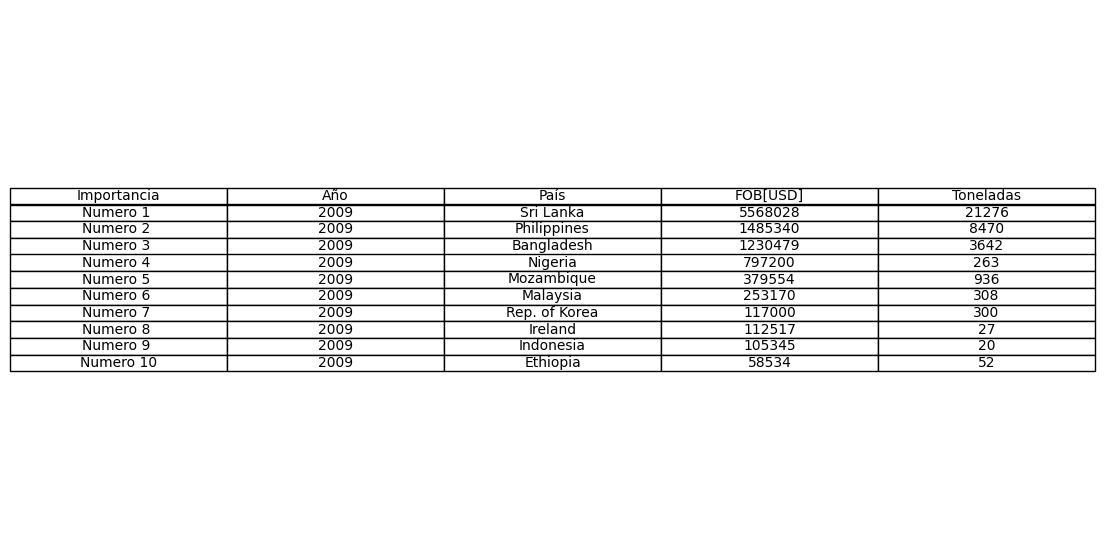

In [20]:
# Visualizar el DataFrame como tabla con matplotlib 2009
fig, ax = plt.subplots(figsize=(14,7))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_subset_ordenado_2009.values, colLabels=df_subset_ordenado_2009.columns, cellLoc='center', loc='center')

# Guardar la visualización como una imagen PNG
plt.savefig('Wheat_df_2009.png', bbox_inches='tight')

plt.show()

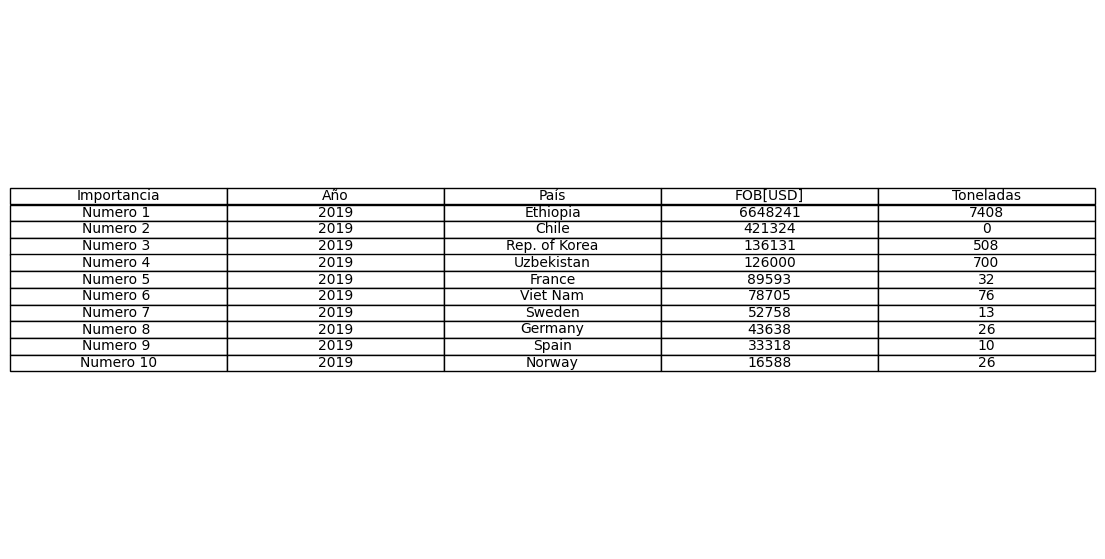

In [21]:
# Visualizar el DataFrame como tabla con matplotlib 
fig, ax = plt.subplots(figsize=(14,7))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_subset_ordenado_2019.values, colLabels=df_subset_ordenado_2019.columns, cellLoc='center', loc='center')

# Guardar la visualización como una imagen PNG
plt.savefig('Wheat_df_2019.png', bbox_inches='tight')

plt.show()

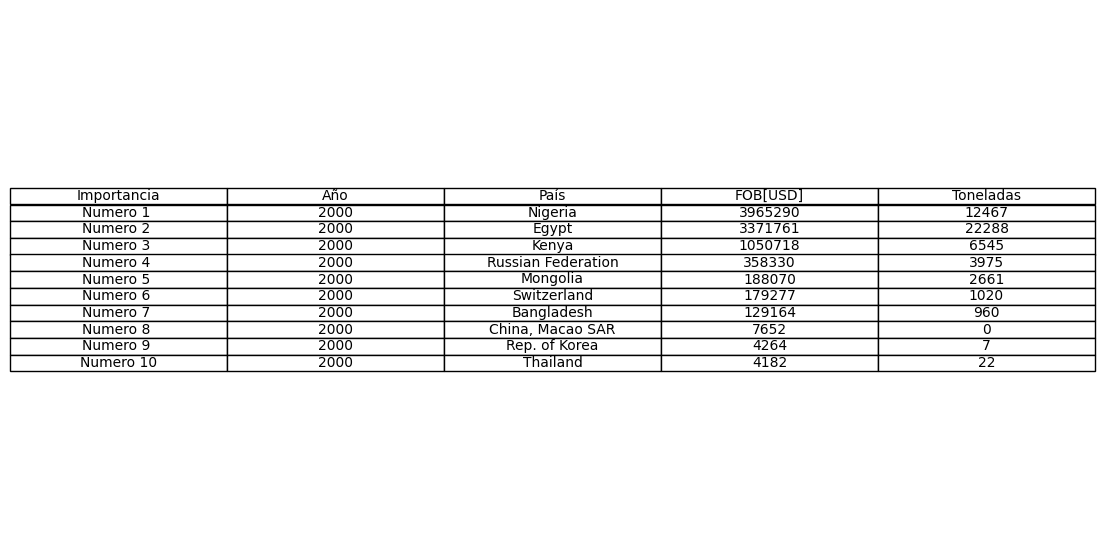

In [22]:
# Visualizar el DataFrame como tabla con matplotlib 
fig, ax = plt.subplots(figsize=(14,7))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_subset_ordenado_2000.values, colLabels=df_subset_ordenado_2000.columns, cellLoc='center', loc='center')

# Guardar la visualización como una imagen PNG
plt.savefig('Wheat_df_2000.png', bbox_inches='tight')

plt.show()

In [23]:
# Supongamos que deseas exportar a un archivo CSV llamado 'df_subset_ordenado.csv'
df_subset_ordenado.head(10).to_csv('df_subset_ordenado.csv', index=False)
df_subset_ordenado

NameError: name 'df_subset_ordenado' is not defined

In [ ]:
print("Valores únicos de RefYear en 2019:", df_subset_ordenado_2019['RefYear'].unique())